# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

## **A) Verifique os tipos de dados, fazendo as transformações quando necessário.**

In [3]:
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [5]:
df['Income'] = df['Income'].apply(lambda x: float(x.replace(".","").replace(",",".")))

df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29.0,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34.0,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39.0,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44.0,Male,87500.0,Master's Degree,Single,0,Owned,High


## **B) Verifique se temos colunas com dados faltantes.Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [6]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [7]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [8]:
media_idade_female = df[ df['Gender'] == 'Female']['Age'].mean()
media_idade_male = df[ df['Gender'] == 'Male']['Age'].mean()
print(media_idade_female,media_idade_male)

35.64705882352941 39.54838709677419


In [9]:
df.loc[df['Gender'] == 'Female', 'Age'] = df.loc[df['Gender'] == 'Female', 'Age'].fillna(media_idade_female)

df.loc[df['Gender'] == 'Male', 'Age'] = df.loc[df['Gender'] == 'Male', 'Age'].fillna(media_idade_male)

In [10]:
df['Age'].astype(int)

0      25
1      30
2      35
3      40
4      45
       ..
159    29
160    34
161    39
162    44
163    49
Name: Age, Length: 164, dtype: int32

In [11]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

### Justificativa: Optei por realizar a subtituição pela media da idade pois os dados faltantes resultavam em 20% do dataset e se esses dados fossem removidos poderiam afetar o desempenho do modelo.

## **C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [12]:
print(df['Gender'].unique())
print(df['Education'].unique())
print(df['Marital Status'].unique())
print(df['Home Ownership'].unique())

['Female' 'Male']
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['Single' 'Married']
['Rented' 'Owned']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

## **A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [13]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.502569,83765.243902,0.652439
std,7.613934,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


### Analise da Age

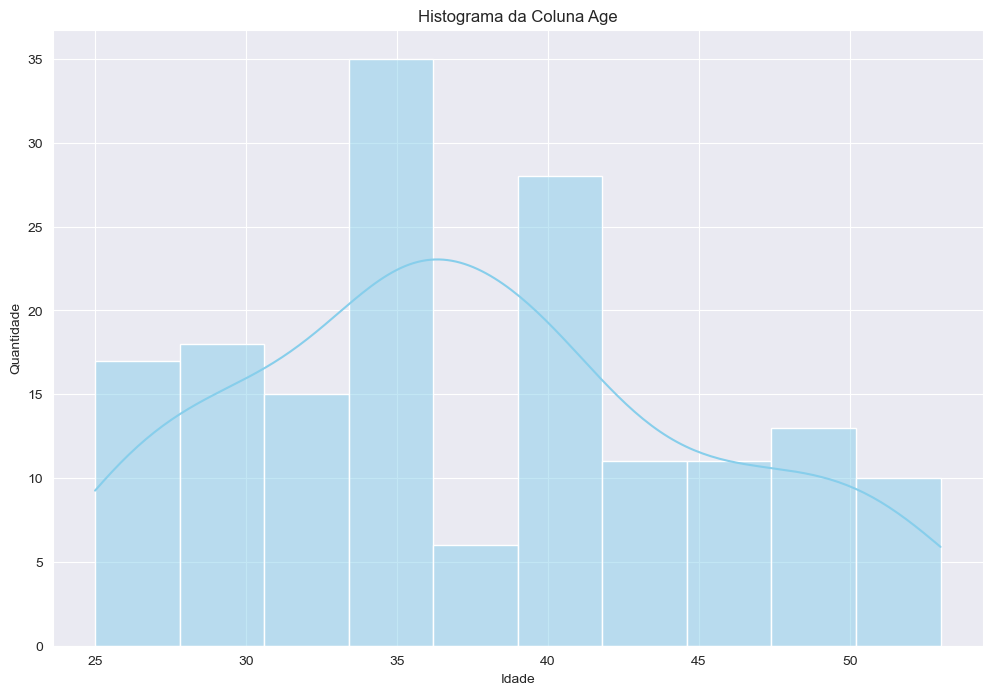

In [14]:
sns.set_style('darkgrid')

# histograma da idade para analisarmos a distribuição dos dados
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.title('Histograma da Coluna Age')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

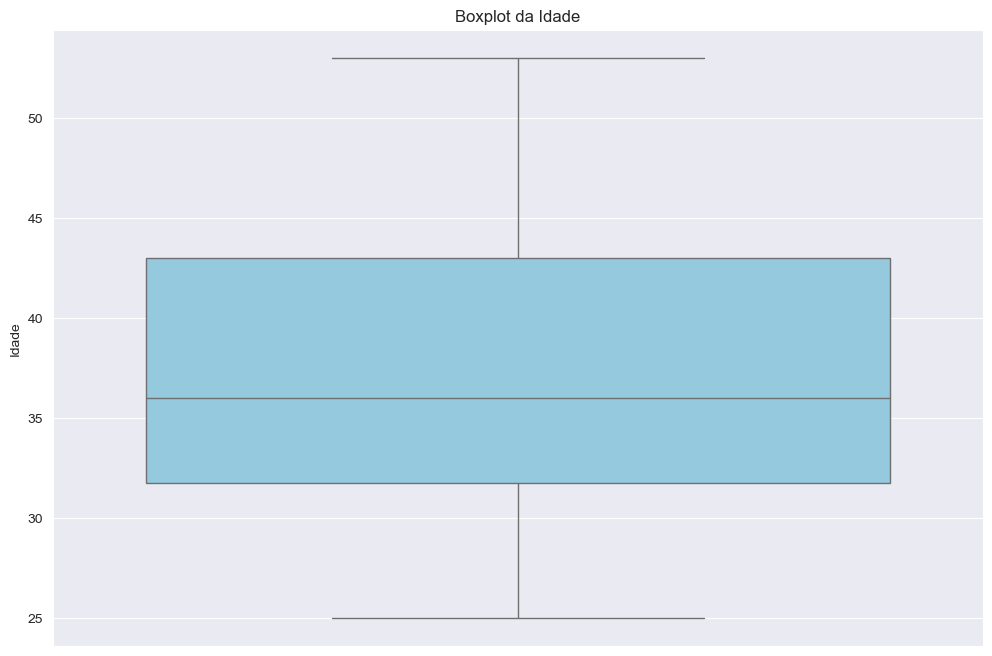

In [15]:
sns.set_style('darkgrid')

# boxplot da coluna da Idade
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Age', color='skyblue')
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

### Analise do Income

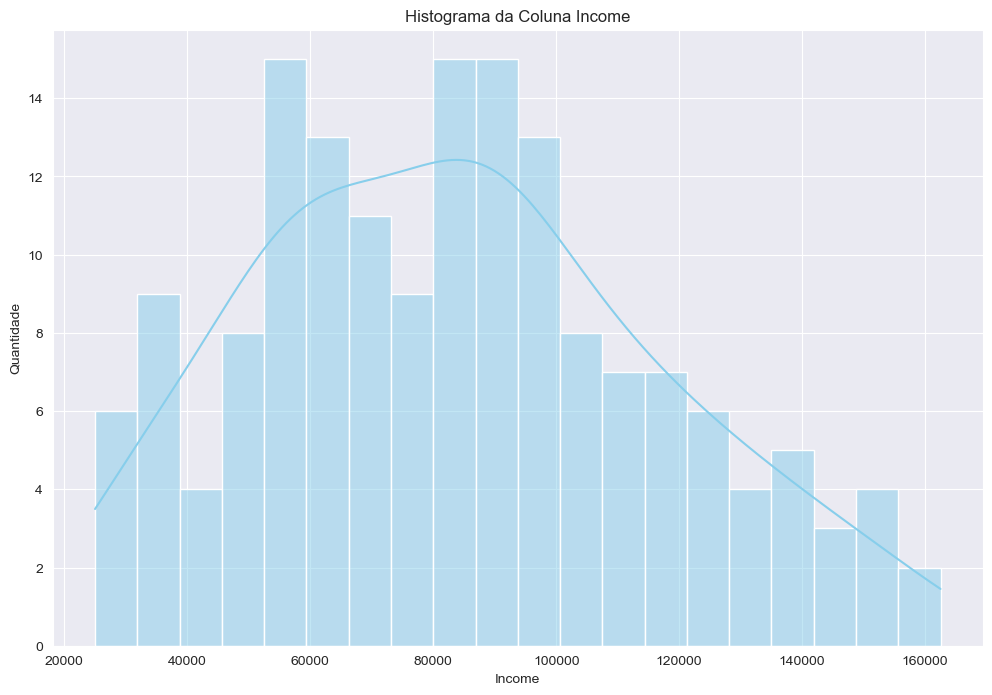

In [16]:
sns.set_style('darkgrid')

# histograma do salário anual para analisarmos a distribuição dos dados
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Income', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Income')
plt.xlabel('Income')
plt.ylabel('Quantidade')
plt.show()

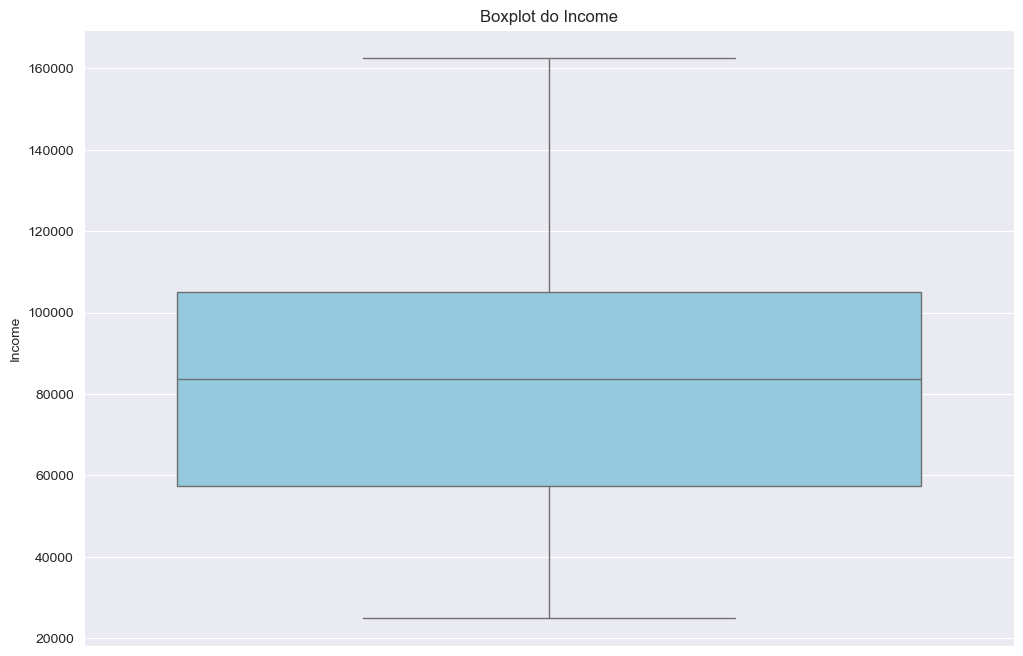

In [17]:
sns.set_style('darkgrid')

# boxplot da coluna de Income
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Income', color='skyblue')
plt.title('Boxplot do Income')
plt.ylabel('Income')
plt.show()

### Analise do Número de Filhos

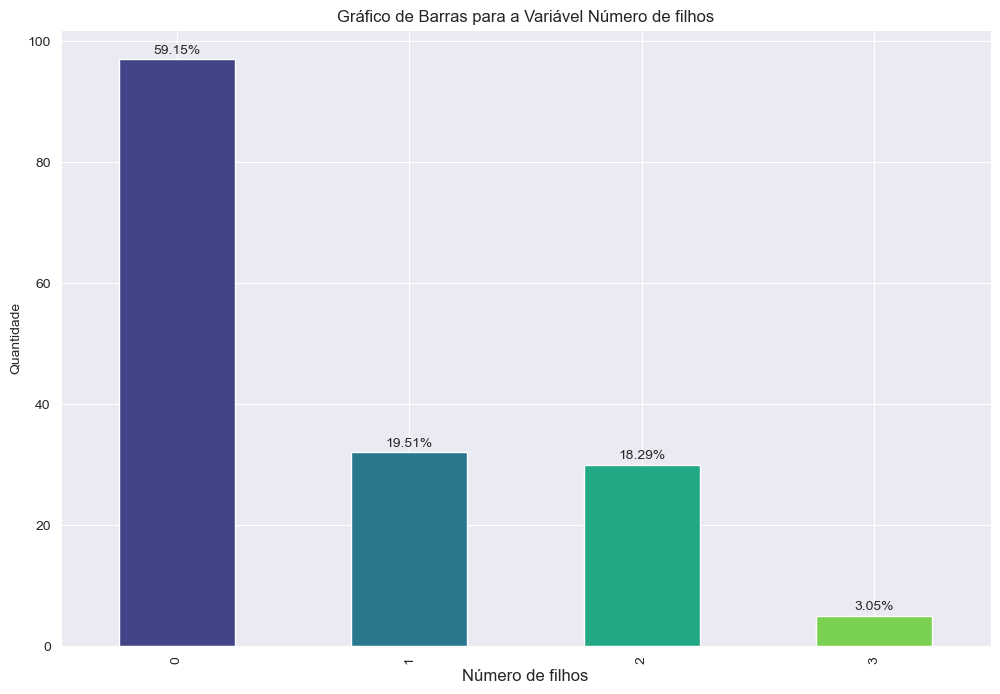

In [18]:
contagem_numero_filhos = df['Number of Children'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_numero_filhos.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_numero_filhos)))

porcentagem_numero_filhos = (contagem_numero_filhos / contagem_numero_filhos.sum()) * 100
for i, v in enumerate(contagem_numero_filhos):
    ax.text(i, v + 1, f'{porcentagem_numero_filhos[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Número de filhos')
plt.xlabel('Número de filhos', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

### A primeira vista, sem presença de outliers na variáveis numéricas.

## **B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [19]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

### Analise da coluna Gender

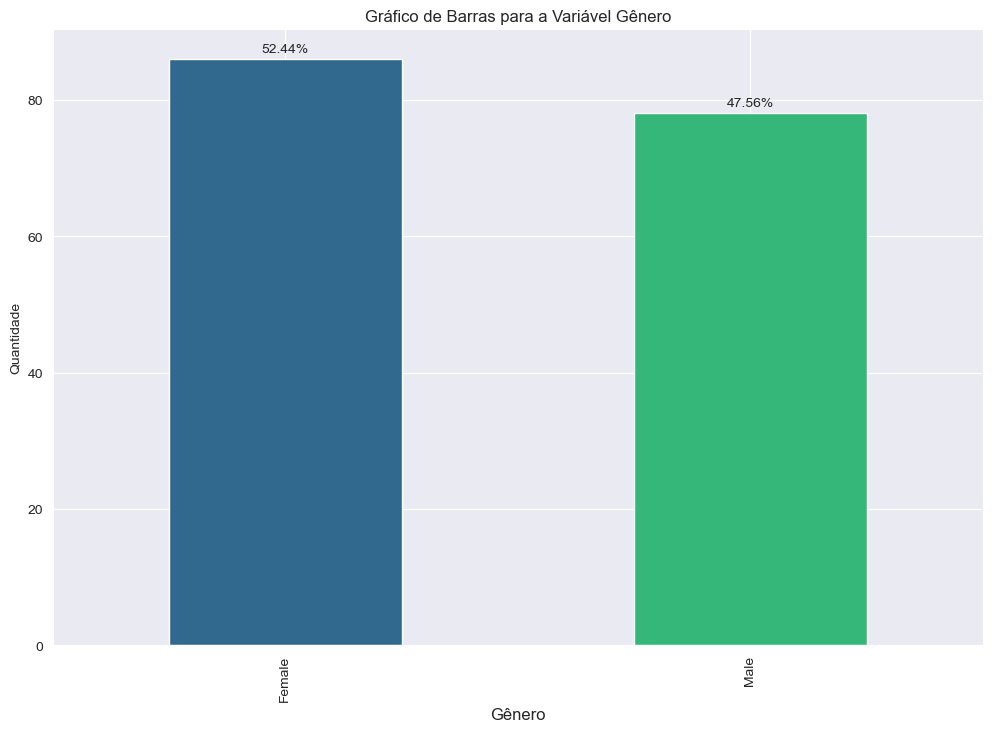

In [20]:
contagem_genero = df['Gender'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_genero.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_genero)))


porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100
for i, v in enumerate(contagem_genero):
    ax.text(i, v + 1, f'{porcentagem_genero.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Gênero')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

### Analise da coluna Education

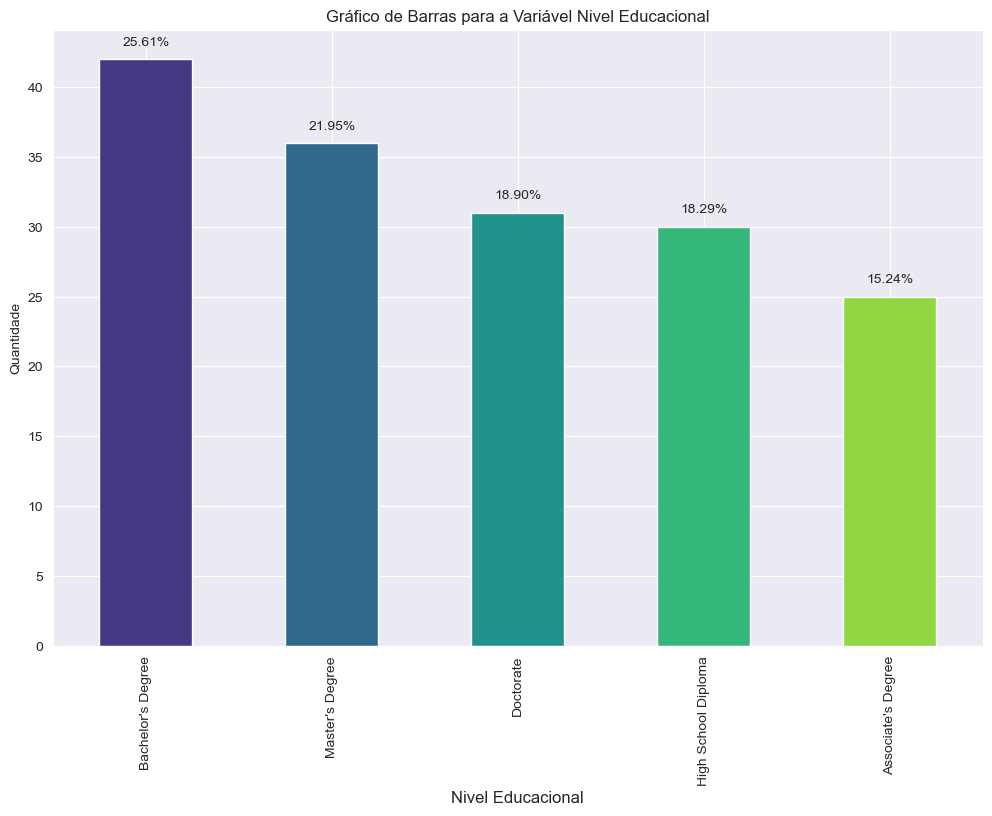

In [21]:
contagem_educacao = df['Education'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_educacao.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_educacao)))


porcentagem_educacao = (contagem_educacao / contagem_educacao.sum()) * 100
for i, v in enumerate(contagem_educacao):
    ax.text(i, v + 1, f'{porcentagem_educacao.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Nivel Educacional')
plt.xlabel('Nivel Educacional', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

### Analise Coluna Martial Status

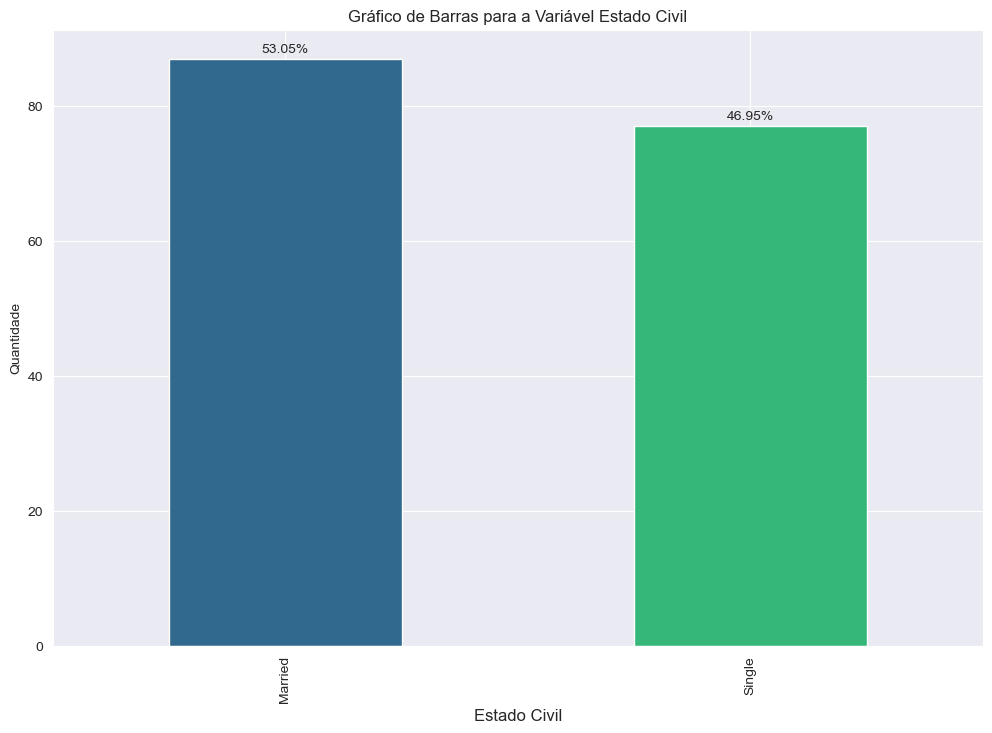

In [22]:
contagem_estado_civil = df['Marital Status'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_estado_civil.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_estado_civil)))


porcentagem_estado_civil = (contagem_estado_civil / contagem_estado_civil.sum()) * 100
for i, v in enumerate(contagem_estado_civil):
    ax.text(i, v + 1, f'{porcentagem_estado_civil.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Estado Civil')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

### Analise Coluna Home Ownership

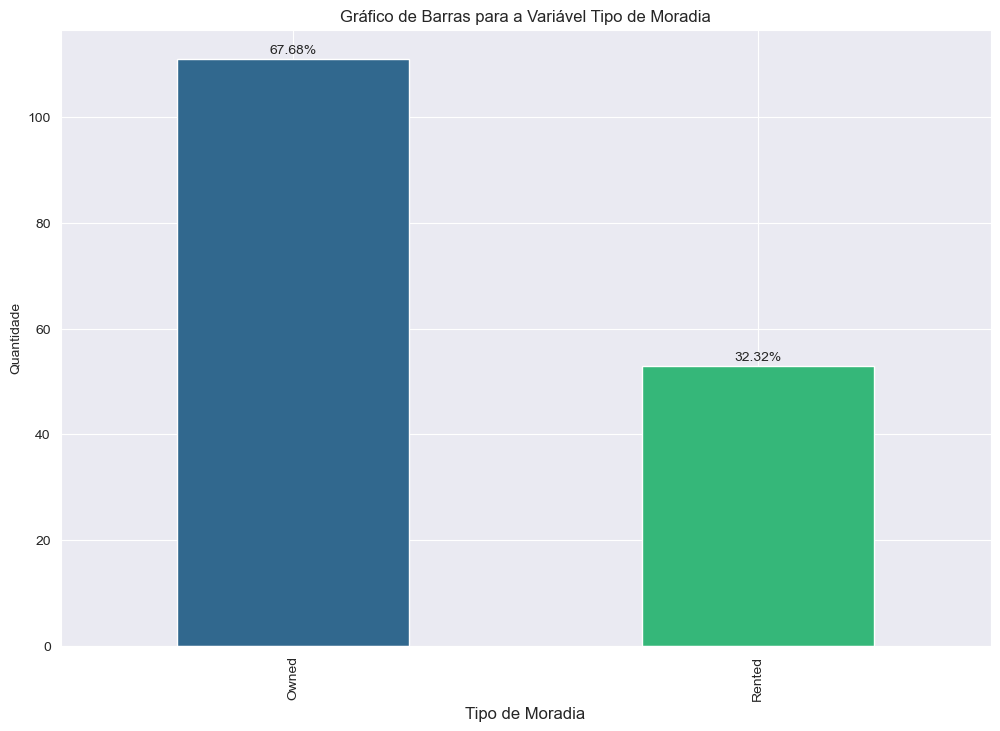

In [23]:
contagem_moradia = df['Home Ownership'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_moradia.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_moradia)))


porcentagem_moradia = (contagem_moradia / contagem_moradia.sum()) * 100
for i, v in enumerate(contagem_moradia):
    ax.text(i, v + 1, f'{porcentagem_moradia.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Tipo de Moradia')
plt.xlabel('Tipo de Moradia', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

### Analise da Coluna Credit Score

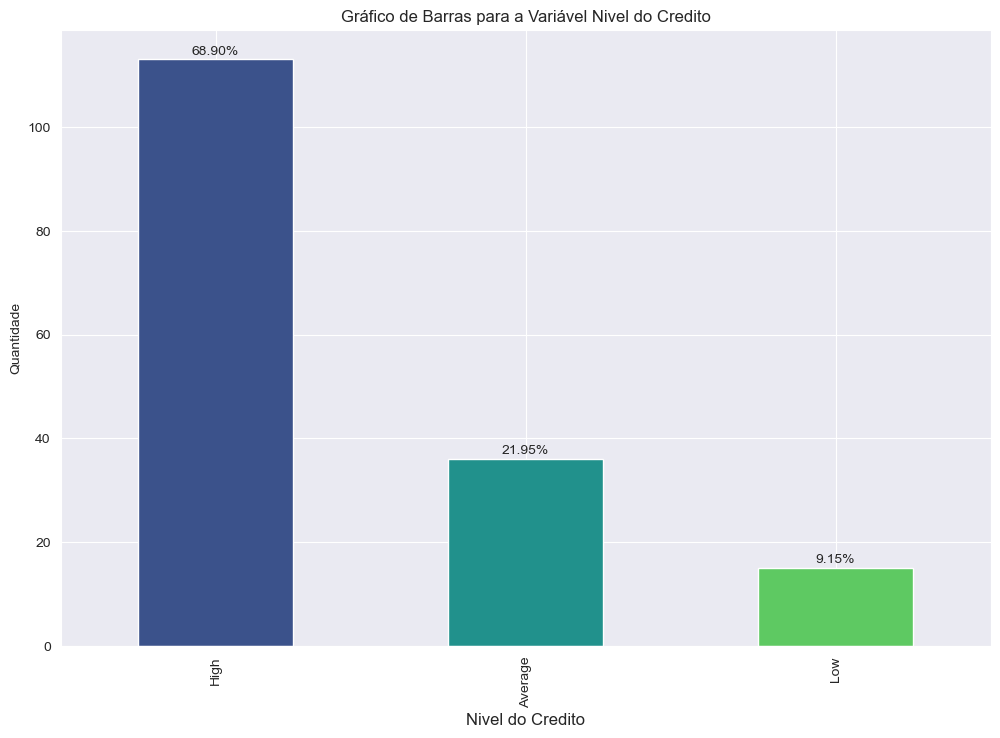

In [24]:
contagem_credito = df['Credit Score'].value_counts()
plt.figure(figsize=(12, 8))
ax = contagem_credito.plot(kind='bar', color=sns.color_palette("viridis", len(contagem_credito)))


porcentagem_credito = (contagem_credito / contagem_credito.sum()) * 100
for i, v in enumerate(contagem_credito):
    ax.text(i, v + 1, f'{porcentagem_credito.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Nivel do Credito')
plt.xlabel('Nivel do Credito', fontsize=12)
plt.ylabel('Quantidade')

plt.show()

## **C) Você encontrou alguma coluna com outliers? Se sim realize o tratamento desses casos.**

<p>Não encontrei colunas com outliers<p>

## **D) Realize a análise Bivariada.Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



### Existe relação entre a idade e o status civil?

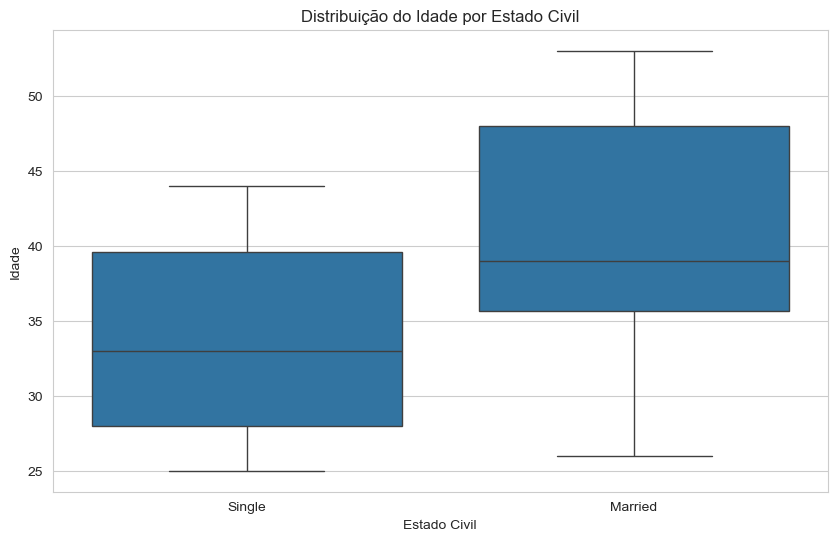

In [25]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital Status', y='Age')
plt.title("Distribuição do Idade por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Idade")
plt.show()

<p>De fato, existe uma relação entre idade e estado civil. Podemos observar, pelo boxplot, que a distribuição é visivelmente diferente em ambos os casos: pessoas mais velhas tendem a ser casadas, enquanto pessoas mais jovens têm maior probabilidade de serem solteiras.</p>

### Qual a relação entre o score de crédito e o nível de escolaridade?

In [26]:
df_grouped = df.groupby(['Credit Score', 'Education']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score ) * 100

fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Education', barmode='stack',
             labels={'Credit Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Education': 'Escolaridade'})

fig.update_layout(title='Relação entre Score de Crédito e Escolaridade',
                  yaxis_title='Porcentagem',
                  legend_title='Escolaridade')

fig.show()

<p>Novamente, é visível uma clara relação entre a proporção de escolaridade e o score de crédito. É evidente que, quanto maior o nível de escolaridade, maior a chance de o score de crédito ser elevado, isso pode nos levar a crer que pessoas que tem maior grau de escolaridade são menos propensas a inadimplência.</p>

### O salário parece influenciar na idade?

In [27]:
media_salario_por_idade = df.groupby('Age')['Income'].mean().reset_index()

fig = px.line(media_salario_por_idade, x='Age', y='Income',
              title='Relação entre Idade e Salário Anual',
              labels={'Age': 'Idade', 'Income': 'Média Salário Anual'})

fig.show()

<p>Existe uma relação entre idade e salário, na qual é visível a tendência de o salário anual aumentar conforme a idade também aumenta, e podemos inferir que quanto maior o salário maior o scre de crédito.</p>

### O salário parece influenciar no Score de Crédito?

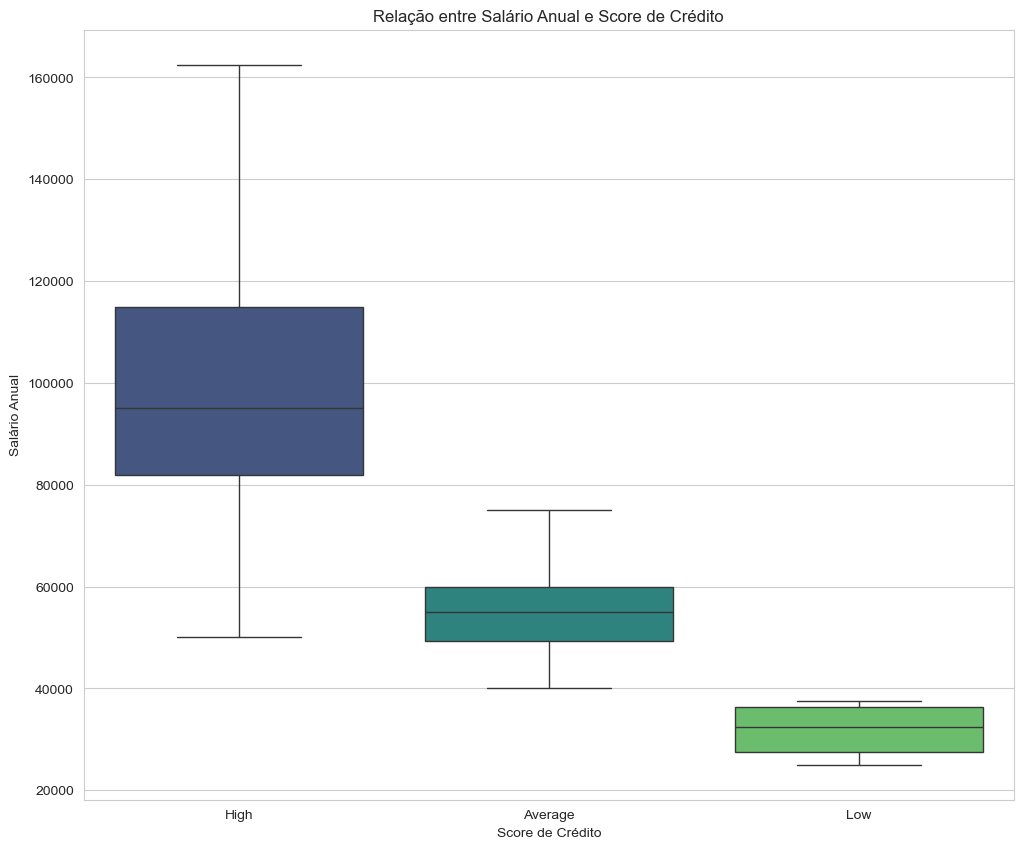

In [28]:
ordem_score = df['Credit Score'].unique()

plt.figure(figsize=(12, 10))
sns.boxplot(x="Credit Score", y="Income", data=df, order=ordem_score,  hue="Credit Score", palette="viridis")
plt.title("Relação entre Salário Anual e Score de Crédito")
plt.xlabel("Score de Crédito")
plt.ylabel("Salário Anual")
plt.show()

<p>Claramente, existe uma relação forte entre o salário e o score de crédito, isso é razoavel pois quanto maior o salario menor o risco do cliente ser inadimplente.</p>


### Clientes com casa própria tendem a ter um score mais alto?

In [29]:
df_grouped = df.groupby(['Home Ownership', 'Credit Score']).size().reset_index(name='count')
total_por_moradia = df_grouped.groupby('Home Ownership')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_moradia ) * 100

fig = px.bar(df_grouped, x='Home Ownership', y='percent', color='Credit Score', barmode='stack',
             labels={'Home Ownership': 'Tipo de Moradia', 'percent': 'Porcentagem', 'Credit Score': 'Score de Crédito'})

fig.update_layout(title='Relação entre Tipo de Moradia e Score de Crédito',
                  yaxis_title='Porcentagem',
                  legend_title='Score de Crédito')

fig.show()

<p>É evidente que clientes que possuem casa própria têm o score mais alto, isso faz sentido pois o aluguel pode ser um fator a mais para inadimplência.</p>

## **E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**
Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [30]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

### Relação entre Estado Civil e Credit Score

In [31]:
df_grouped = df.groupby(['Marital Status', 'Credit Score']).size().reset_index(name='count')
total_por_estado_civil = df_grouped.groupby('Marital Status')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_estado_civil ) * 100

fig = px.bar(df_grouped, x='Marital Status', y='percent', color='Credit Score', barmode='stack',
             labels={'Marital Status': 'Estado Civil', 'percent': 'Porcentagem', 'Credit Score': 'Score de Crédito'})

fig.update_layout(title='Relação entre Estado Civil e Score de Crédito',
                  yaxis_title='Porcentagem',
                  legend_title='Score de Crédito')

fig.show()

<p>Esse último ficou muito parecido com o plot que realizei entre tipo de moradia e score de crédito, o que me leva a crer que exista uma relação entre tipo de moradia e estado civil.</p>

### Relação entre Tipo de Moradia e Estado Civil

In [32]:
df_grouped = df.groupby(['Marital Status', 'Home Ownership']).size().reset_index(name='count')
total_por_estado_civil = df_grouped.groupby('Marital Status')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_estado_civil ) * 100

fig = px.bar(df_grouped, x='Marital Status', y='percent', color='Home Ownership', barmode='stack',
             labels={'Marital Status': 'Estado Civil', 'percent': 'Porcentagem', 'Home Ownership': 'Tipo de Moradia'})

fig.update_layout(title='Relação entre Estado Civil e Tipo de Moradia',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo de Moradia')

fig.show()

<p>De fato essas duas variaveis parecem estar bem correlacionadas, o que pode ser um problema para o modelo, remover uma das 2 parece o mais "correto".</p>

### Relação entre o Número de Filhos e Score de Crédito.

In [33]:
df_grouped = df.groupby(['Credit Score', 'Number of Children']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score ) * 100

fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Number of Children', barmode='stack',
             labels={'Credit Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Number of Children': 'Quantidade de Filhos'})

fig.update_layout(title='Relação entre Score de Crédito e Quantidade de Filhos',
                  yaxis_title='Porcentagem',
                  legend_title='Quantidade de Filhos')

fig.show()

<p>A quantidade de filhos parece ser uma variavel que tem terá um grande impacto no score de crédito, o senso comum nos diz que ter filhos é "caro" e aqui vemos que de fato faz sentido.</p>

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

## **A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [45]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [54]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [41]:
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.000000,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.000000,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.000000,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.000000,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.000000,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
5,50.000000,Male,150000.0,Master's Degree,Married,0,Owned,High
6,26.000000,Female,40000.0,Associate's Degree,Single,0,Rented,Average
7,31.000000,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average
8,35.647059,Female,80000.0,Master's Degree,Married,2,Owned,High
9,39.548387,Male,105000.0,Doctorate,Single,0,Owned,High


In [55]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Gender"
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Aplicando o Label Encoder para a coluna "Marital Status"
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital Status'])

# Aplicando o Label Encoder para a coluna "Home Ownership"
df['Home_Ownership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])

# Definindo a ordem correta dos níveis de escolaridade
ordem_escolaridade = ["High School Diploma", "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Doctorate"]

# Inicializando o OrdinalEncoder com a ordem personalizada
encoder_escolaridade = OrdinalEncoder(categories=[ordem_escolaridade])

# Transformando a coluna 'Education' em array 2D e aplicando o OrdinalEncoder
df['Education_encoded'] = encoder_escolaridade.fit_transform(df['Education'].values.reshape(-1, 1))

# Definindo a ordem correta dos níveis de credit score
ordem_credit_score = ['Low', 'Average', 'High']

# Inicializando o OrdinalEncoder com a ordem personalizada
encoder_credit_score = OrdinalEncoder(categories=[ordem_credit_score])

# Transformando a coluna 'Credit Score' em array 2D e aplicando o OrdinalEncoder
df['Credit_Score_encoded'] = encoder_credit_score.fit_transform(df['Credit Score'].values.reshape(-1, 1))

# Exibindo as primeiras 10 linhas
df.head(10)


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
0,25.000000,Female,50000.0,Bachelor's Degree,Single,0,Rented,High,0,2.0,1,1,2.0
1,30.000000,Male,100000.0,Master's Degree,Married,2,Owned,High,1,3.0,0,0,2.0
2,35.000000,Female,75000.0,Doctorate,Married,1,Owned,High,0,4.0,0,0,2.0
3,40.000000,Male,125000.0,High School Diploma,Single,0,Owned,High,1,0.0,1,0,2.0
4,45.000000,Female,100000.0,Bachelor's Degree,Married,3,Owned,High,0,2.0,0,0,2.0
5,50.000000,Male,150000.0,Master's Degree,Married,0,Owned,High,1,3.0,0,0,2.0
6,26.000000,Female,40000.0,Associate's Degree,Single,0,Rented,Average,0,1.0,1,1,1.0
7,31.000000,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average,1,2.0,1,1,1.0
8,35.647059,Female,80000.0,Master's Degree,Married,2,Owned,High,0,3.0,0,0,2.0
9,39.548387,Male,105000.0,Doctorate,Single,0,Owned,High,1,4.0,1,0,2.0


#### Tabela da matriz de correlação

In [56]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
Age,1.000000,0.641868,0.042521,0.256675,0.175784,-0.431334,-0.632429,0.581643
Income,0.641868,1.000000,0.084547,0.495738,0.253858,-0.471004,-0.704928,0.744407
Number of Children,0.042521,0.084547,1.000000,-0.442139,0.317956,-0.696984,-0.497129,0.426280
Gender_encoded,0.256675,0.495738,-0.442139,1.000000,-0.082355,0.278362,-0.031519,0.194962
Education_encoded,0.175784,0.253858,0.317956,-0.082355,1.000000,-0.341955,-0.490329,0.538476
Marital_Status_encoded,-0.431334,-0.471004,-0.696984,0.278362,-0.341955,1.000000,0.708374,-0.619854
Home_Ownership_encoded,-0.632429,-0.704928,-0.497129,-0.031519,-0.490329,0.708374,1.000000,-0.854970
Credit_Score_encoded,0.581643,0.744407,0.426280,0.194962,0.538476,-0.619854,-0.854970,1.000000


#### Mapa de calor Matriz de Correlação

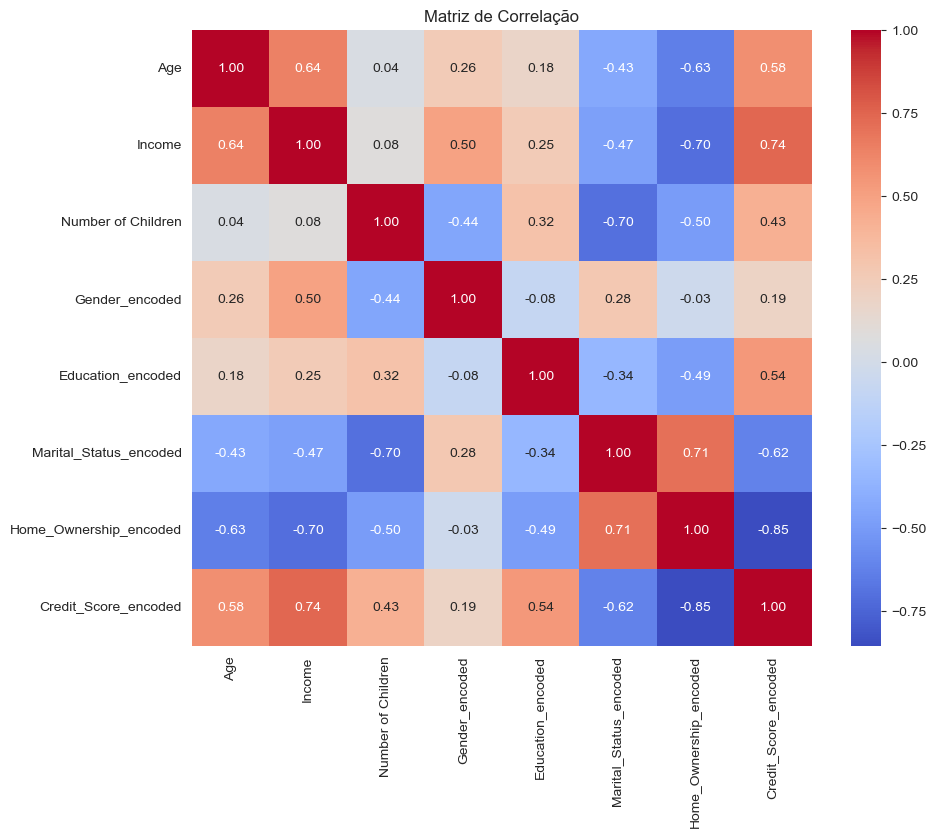

In [57]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

## **B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Sim, existem variáveis que têm uma média e alta correlação. São elas:

1. Score de crédito e Tipo de Moradia
2. Score de crédito e Estado civil
3. Score de crédito e Escolaridade
4. Score de crédito e Número de filhos
5. Score de crédito e Salário anual
6. Score de crédito e Idade
7. Tipo de Moradia e Estado civil
8. Tipo de Moradia e Escolaridade
9. Tipo de Moradia e Número de filhos
10. Tipo de Moradia e Salário anual
11. Tipo de Moradia e Idade
12. Estado civil e Número de filhos

Sim, pelo senso comum faz sentido que essas variáveis tenham correlação. É justificável, pois moradia, filhos, escolaridade, idade (tempo), estado civil e salário anual têm valores atribuídos. Podemos dizer que são variáveis "caras", então quem as possui em maior quantidade tende a ser mais "rico" e, com isso, tende a ter menor chance de inadimplência.

## **C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [59]:
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
0,25.000000,Female,50000.0,Bachelor's Degree,Single,0,Rented,High,0,2.0,1,1,2.0
1,30.000000,Male,100000.0,Master's Degree,Married,2,Owned,High,1,3.0,0,0,2.0
2,35.000000,Female,75000.0,Doctorate,Married,1,Owned,High,0,4.0,0,0,2.0
3,40.000000,Male,125000.0,High School Diploma,Single,0,Owned,High,1,0.0,1,0,2.0
4,45.000000,Female,100000.0,Bachelor's Degree,Married,3,Owned,High,0,2.0,0,0,2.0
5,50.000000,Male,150000.0,Master's Degree,Married,0,Owned,High,1,3.0,0,0,2.0
6,26.000000,Female,40000.0,Associate's Degree,Single,0,Rented,Average,0,1.0,1,1,1.0
7,31.000000,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average,1,2.0,1,1,1.0
8,35.647059,Female,80000.0,Master's Degree,Married,2,Owned,High,0,3.0,0,0,2.0
9,39.548387,Male,105000.0,Doctorate,Single,0,Owned,High,1,4.0,1,0,2.0


In [60]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score',
       'Gender_encoded', 'Education_encoded', 'Marital_Status_encoded',
       'Home_Ownership_encoded', 'Credit_Score_encoded'],
      dtype='object')

In [61]:
df = df.drop(['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score',],axis=1)

df.head(10)

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
0,25.000000,50000.0,0,0,2.0,1,1,2.0
1,30.000000,100000.0,2,1,3.0,0,0,2.0
2,35.000000,75000.0,1,0,4.0,0,0,2.0
3,40.000000,125000.0,0,1,0.0,1,0,2.0
4,45.000000,100000.0,3,0,2.0,0,0,2.0
5,50.000000,150000.0,0,1,3.0,0,0,2.0
6,26.000000,40000.0,0,0,1.0,1,1,1.0
7,31.000000,60000.0,0,1,2.0,1,1,1.0
8,35.647059,80000.0,2,0,3.0,0,0,2.0
9,39.548387,105000.0,0,1,4.0,1,0,2.0


## **D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [62]:
df.corr()

,Age,Income,Number of Children,Gender_encoded,Education_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
Age,1.000000,0.641868,0.042521,0.256675,0.175784,-0.431334,-0.632429,0.581643
Income,0.641868,1.000000,0.084547,0.495738,0.253858,-0.471004,-0.704928,0.744407
Number of Children,0.042521,0.084547,1.000000,-0.442139,0.317956,-0.696984,-0.497129,0.426280
Gender_encoded,0.256675,0.495738,-0.442139,1.000000,-0.082355,0.278362,-0.031519,0.194962
Education_encoded,0.175784,0.253858,0.317956,-0.082355,1.000000,-0.341955,-0.490329,0.538476
Marital_Status_encoded,-0.431334,-0.471004,-0.696984,0.278362,-0.341955,1.000000,0.708374,-0.619854
Home_Ownership_encoded,-0.632429,-0.704928,-0.497129,-0.031519,-0.490329,0.708374,1.000000,-0.854970
Credit_Score_encoded,0.581643,0.744407,0.426280,0.194962,0.538476,-0.619854,-0.854970,1.000000


Sim, existem variáveis que têm uma média e alta correlação. São elas:

1. Score de crédito e Tipo de Moradia
2. Score de crédito e Estado civil
3. Score de crédito e Escolaridade
4. Score de crédito e Número de filhos
5. Score de crédito e Salário anual
6. Score de crédito e Idade
7. Tipo de Moradia e Estado civil
8. Tipo de Moradia e Escolaridade
9. Tipo de Moradia e Número de filhos
10. Tipo de Moradia e Salário anual
11. Tipo de Moradia e Idade
12. Estado civil e Número de filhos

Sim, pelo senso comum faz sentido que essas variáveis tenham correlação. É justificável, pois moradia, filhos, escolaridade, idade (tempo), estado civil e salário anual têm valores atribuídos. Podemos dizer que são variáveis "caras", então quem as possui em maior quantidade tende a ser mais "rico" e, com isso, tende a ter menor chance de inadimplência.

## **F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [63]:
# Separar os dados em features (X) e o alvo (y)
X = df.drop('Credit_Score_encoded', axis=1)  # Considerando que 'Credi Score' é a coluna a ser predita
y = df['Credit_Score_encoded']

In [65]:
from sklearn.model_selection import train_test_split

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O parâmetro 'test_size' determina a proporção dos dados que serão separados para teste (25% neste exemplo)
# O parâmetro 'random_state' é usado para garantir que a divisão seja reproduzível

In [67]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 7)
Tamanho de X_test: (41, 7)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)


## **G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit_Score_encoded'>

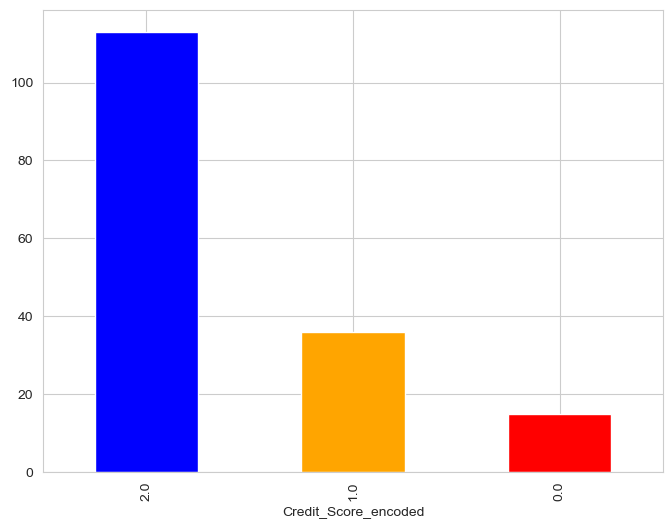

In [69]:
contagem = df['Credit_Score_encoded'].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=['blue', 'orange', 'red'])

In [70]:
# Calcular e imprimir as porcentagens dos valores na coluna
print((df['Credit_Score_encoded'].value_counts(normalize=True) * 100))

Credit_Score_encoded
2.0    68.902439
1.0    21.951220
0.0     9.146341
Name: proportion, dtype: float64


<p>Claramente desbalanceado.</p>

## **H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [71]:
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Credit_Score_encoded
1.0    84
0.0    84
2.0    84
Name: count, dtype: int64


In [72]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
Credit_Score_encoded
1.0    84
0.0    84
2.0    84
Name: count, dtype: int64


In [73]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_test.to_csv('X_test.csv', index=False)